<a href="https://colab.research.google.com/github/BryanGF0822/getting-started-with-Pyspark/blob/main/Getting_Started_with_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pyspark Tutorial: Getting Started with Pyspark

Enlace DataCamp: https://www.datacamp.com/tutorial/pyspark-tutorial-getting-started-with-pyspark


In [ ]:
#Instalación de PySpark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Montamos nuestro Google Drive en Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importamos la libreria de SparkSession
from pyspark.sql import SparkSession

# Paso 1: Crear un SparkSession

In [ ]:
#Crear una SparkSession
spark = SparkSession.builder.appName("Datacamp Pyspark Tutorial").config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

# Paso 2: Crear el marco de datos

In [ ]:
#crear el marco de datos
df = spark.read.csv('/content/drive/My Drive/Data Engineer Academy/Modulo 4 - Colab/datacamp_ecommerce.csv',header=True,escape="\"")

In [ ]:
#Echemos un vistazo al encabezado del dataframe usando la función show():
df.show(5,0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
+---------+---------+-----------------------------------+--------+------

# Paso 3: Analisis de datos exploratorio

In [ ]:
#Vamos a contar el numero de filas en el marco de datos
df.count() #Answer: 2,500

2500

In [ ]:
#Cuando clientes unicos estan presentes en el marco de datos?
df.select('CustomerID').distinct().count() #Answer: 95

95

In [ ]:
#¿De que pais provienen la mayoria de las compras?
#Para encontrar el pais desde el que se realizan la mayoria de las compras, necesitamos usar la clausula groupBy() en PySpark
from pyspark.sql.functions import *
from pyspark.sql.types import *

df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).show()

+--------------+-------------+
|       Country|country_count|
+--------------+-------------+
|       Germany|            2|
|        France|            1|
|          EIRE|            1|
|        Norway|            1|
|     Australia|            1|
|United Kingdom|           88|
|   Netherlands|            1|
+--------------+-------------+



In [ ]:
#Tenga en cuenta que los datos de la tabla anterior no se presentan en el orden de las compras. 
#Para ordenar esta tabla, podemos incluir la cláusula orderBy():
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(desc('country_count')).show()

+--------------+-------------+
|       Country|country_count|
+--------------+-------------+
|United Kingdom|           88|
|       Germany|            2|
|        France|            1|
|          EIRE|            1|
|     Australia|            1|
|        Norway|            1|
|   Netherlands|            1|
+--------------+-------------+



In [ ]:
#¿Cuando fue la compra más reciente realizada por un cliente en la plataforma de comercio electronico?
#Para saber cuándo se realizó la última compra en la plataforma, debemos convertir la columna "Fecha de la factura" 
#a un formato de marca de tiempo y usar la función max() en Pyspark:

spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date',to_timestamp("InvoiceDate", 'yy/MM/dd HH:mm'))
df.select(max("date")).show()

+-------------------+
|          max(date)|
+-------------------+
|2012-01-10 17:06:00|
+-------------------+



In [ ]:
#¿Cuando fue la primera compra realizada por un cliente en la plataforma de comercio electronico?
#la funcion min() se puede usar para encontrar la fecha y hora de compra mas temprana:

df.select(min("date")).show()

+-------------------+
|          min(date)|
+-------------------+
|2012-01-10 08:26:00|
+-------------------+



Tenga en cuenta que las compras más recientes y más antiguas se realizaron el mismo día con solo unas pocas horas de diferencia. Esto significa que el conjunto de datos que descargamos contiene información de solo compras realizadas en un solo día.

# Paso 4: procesamiento de datos

In [ ]:
#Echemos un vistazo al encabezado del marco de datos una vez más para comprender cómo se realizará el preprocesamiento:

df.show(5,0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |
+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEA

A partir del conjunto de datos anterior, necesitamos crear múltiples segmentos de clientes basados ​​en el comportamiento de compra de cada usuario. 

Las variables en este conjunto de datos están en un formato que no se puede ingerir fácilmente en el modelo de segmentación de clientes. Estas características individualmente no nos dicen mucho sobre el comportamiento de compra del cliente.

Debido a esto, utilizaremos las variables existentes para derivar tres nuevas características informativas: actualidad, frecuencia y valor monetario (RFM).

**RFM** se usa comúnmente en marketing para evaluar el valor de un cliente en función de su:

    1. Actualidad: ¿Qué tan recientemente ha realizado una compra cada cliente?
    2. Frecuencia: ¿Con qué frecuencia han comprado algo?
    3. Valor Monetario: ¿Cuánto dinero gastan en promedio al realizar compras?
Ahora preprocesaremos el marco de datos para crear las variables anteriores.

## Recency

In [ ]:
#Primero, calculemos el valor de la actualidad: la última fecha y hora en que se realizó una compra 
#en la plataforma. Esto se puede lograr en dos pasos:

# ASIGNAR UNA PUNTUACION DE ACTUALIDAD A CADA CLIENTE

# Restaremos cada fecha en el marco de datos desde la fecha más antigua. 
# Esto nos dirá qué tan recientemente se vio un cliente en el marco de datos. 
# Un valor de 0 indica la antigüedad más baja, ya que se asignará a la persona 
# que fue vista realizando una compra en la fecha más temprana.

df = df.withColumn("from_date", lit("12/1/10 08:26"))
df = df.withColumn('from_date',to_timestamp("from_date", 'yy/MM/dd HH:mm'))

df2=df.withColumn('from_date',to_timestamp(col('from_date'))).withColumn('recency',col("date").cast("long") - col('from_date').cast("long"))

In [ ]:
# SELECCIONE LA COMPRA MAS RECIENTE

# Un cliente puede realizar varias compras en diferentes momentos. Necesitamos seleccionar
# solo la última vez que fueron vistos comprando un producto, ya que esto es indicativo de 
# cuándo se realizó la compra más reciente: 

df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')),on='recency',how='leftsemi')

In [ ]:
df2.show(5,0)

+-------+---------+---------+-------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|recency|InvoiceNo|StockCode|Description                    |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |from_date          |
+-------+---------+---------+-------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|540    |536369   |21756    |BATH BUILDING BLOCK WORD       |3       |12/1/10 8:35|5.95     |13047     |United Kingdom|2012-01-10 08:35:00|2012-01-10 08:26:00|
|1140   |536370   |22728    |ALARM CLOCK BAKELIKE PINK      |24      |12/1/10 8:45|3.75     |12583     |France        |2012-01-10 08:45:00|2012-01-10 08:26:00|
|1140   |536370   |22727    |ALARM CLOCK BAKELIKE RED       |24      |12/1/10 8:45|3.75     |12583     |France        |2012-01-10 08:45:00|2012-01-10 08:26:00|
|1140   |536370   |22726    |ALARM CLOCK

In [ ]:
# Una forma más fácil de ver todas las variables presentes en un marco de datos de PySpark 
# es usar su función printSchema(). Este es el equivalente de la función info() en Pandas:

df2.printSchema()

root
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)



## Frequency

Ahora calcularemos el valor de la frecuencia: con qué frecuencia un cliente compra algo en la plataforma. Para hacer esto, solo necesitamos agrupar por ID de cada cliente y contar la cantidad de articulos que compraron:

In [ ]:
df_freq = df2.groupBy('CustomerID').agg(count('InvoiceDate').alias('frequency'))

In [ ]:
df_freq.show(5,0)

+----------+---------+
|CustomerID|frequency|
+----------+---------+
|16250     |14       |
|15100     |1        |
|13065     |14       |
|12838     |59       |
|15350     |5        |
+----------+---------+
only showing top 5 rows



Hay un valor de frecuencia adjunto a cada cliente en el marco de datos. Este nuevo marco de datos solo tiene dos columnas, y debemos unirlo con el anterior:

In [ ]:
df3 = df2.join(df_freq,on='CustomerID',how='inner')

In [ ]:
df3.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- frequency: long (nullable = false)



## Monetary Value

Finalmente, calculemos el valor monetario: la cantidad totalgastada por cada cliente en el marco de datos. Hay dos pasos para lograr esto:

In [ ]:
#Observamos los siguentes 3 elementos que nos pueden ayudar con esto:
df = df.select(['CustomerID','Quantity','UnitPrice'])
df.show(5,0)

+----------+--------+---------+
|CustomerID|Quantity|UnitPrice|
+----------+--------+---------+
|17850     |6       |2.55     |
|17850     |6       |3.39     |
|17850     |8       |2.75     |
|17850     |6       |3.39     |
|17850     |6       |3.39     |
+----------+--------+---------+
only showing top 5 rows



In [ ]:
# ENCONTRAR EL MONTO TOTAL GASTADO EN CADA COMPRA:

# Cada ID de cliente viene con variables llamadas "Cantidad" y "Precio unitario" para una sola compra:

# Para obtener el monto total, debemos multiplicar "Cantidad" por "Precio unitario"

m_val = df3.withColumn('TotalAmount',col("Quantity") * col("UnitPrice"))

In [ ]:
# ENCUENTRE EL MONTO TOTAL GASTADO POR CADA CLIENTE:

# Para encontrar el monto total gastado por cada cliente en general, solo necesitamos agrupar
# por la columna CustomerID y sumar el monto total gastado:

m_val = m_val.groupBy('CustomerID').agg(sum('TotalAmount').alias('monetary_value'))

In [ ]:
# Ahora, combinamos este marco de trabajo con todas las demas variables:

finaldf = m_val.join(df3,on='CustomerID',how='inner')

Ahora que hemos creado todas las variables necesarias para construir el modelo, ejecute las siguientes líneas de código para seleccionar solo las columnas requeridas y suelte las filas duplicadas del marco de datos:

In [ ]:
finaldf = finaldf.select(['recency','frequency','monetary_value','CustomerID']).distinct()

In [ ]:
finaldf.show(5,0)

+-------+---------+------------------+----------+
|recency|frequency|monetary_value    |CustomerID|
+-------+---------+------------------+----------+
|5580   |14       |226.14            |16250     |
|2580   |1        |350.4             |15100     |
|30360  |14       |205.85999999999999|13065     |
|12660  |59       |390.78999999999985|12838     |
|18420  |5        |115.65            |15350     |
+-------+---------+------------------+----------+
only showing top 5 rows



## Standardization

Antes de construir el modelo de segmentación de clientes, estandaricemos el marco de datos para asegurarnos de que todas las variables estén en la misma escala:

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assemble=VectorAssembler(inputCols=[
    'recency','frequency','monetary_value'
], outputCol='features')

assembled_data=assemble.transform(finaldf)

scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

Ejecute las siguientes líneas de código para ver cómo se ve el vector de características estandarizado:

In [ ]:
data_scale_output.select('standardized').show(2,truncate=False)

+-------------------------------------------------------------+
|standardized                                                 |
+-------------------------------------------------------------+
|[0.6860448646904731,0.6848507976304103,0.45968090513788246]  |
|[0.31720353958806824,0.048917914116457885,0.7122675738936677]|
+-------------------------------------------------------------+
only showing top 2 rows



Estas son las características escaladas que se incorporarán al algoritmo de agrupamiento.

# Paso 5: Construccion del modelo de aprendizaje automatico

Ahora que hemos completado todo el análisis y la preparación de datos, construyamos el modelo de agrupación en clústeres de **K-Means**.

**El algoritmo se creará utilizando la API de aprendizaje automático de PySpark .**

In [ ]:
# ENCONTRAR EL NUMERO DE CLUSTERES A UTILIZAR

# Al construir un modelo de agrupación en clústeres de K-Means, primero debemos determinar la cantidad 
# de clústeres o grupos que queremos que devuelva el algoritmo. Si nos decidimos por tres clústeres, 
# por ejemplo, tendremos tres segmentos de clientes.

#La técnica más popular utilizada para decidir cuántos conglomerados usar en K-Means se denomina "método del codo".

#Esto se hace simplemente ejecutando el algoritmo K-Means para una amplia gama de conglomerados y 
# visualizando los resultados del modelo para cada conglomerado. El gráfico tendrá un punto de inflexión 
# que se parece a un codo, y solo elegimos la cantidad de grupos en este punto.

#--------------------------------------------
# Ejecutemos las siguientes líneas de código para construir un algoritmo de agrupación en clústeres de 
# K-Means de 2 a 10 clústeres:

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    output=KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

Con los códigos anteriores, hemos construido y evaluado con éxito un modelo de agrupación en clústeres de K-Means con 2 a 10 clústeres. Los resultados se han colocado en una matriz y ahora se pueden visualizar en un gráfico de líneas:

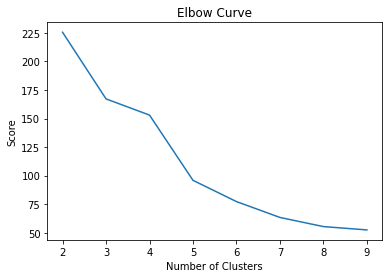

In [ ]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
# CONSTRUYENDO EL MODELO DE AGRUPAMIENTO DE K-MEANS

# En el diagrama de arriba, podemos ver que hay un punto de inflexión que parece
# un codo en cuatro. Debido a esto, procederemos a construir el algoritmo K-Means con cuatro clusters:

KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)

In [ ]:
# HACER PREDICCIONES

# Usemos el modelo que creamos para asignar clústeres a cada cliente en el conjunto de datos:

preds=KMeans_fit.transform(data_scale_output)

preds.show(5,0)

+-------+---------+------------------+----------+---------------------------------+-------------------------------------------------------------+----------+
|recency|frequency|monetary_value    |CustomerID|features                         |standardized                                                 |prediction|
+-------+---------+------------------+----------+---------------------------------+-------------------------------------------------------------+----------+
|5580   |14       |226.14            |16250     |[5580.0,14.0,226.14]             |[0.6860448646904731,0.6848507976304103,0.45968090513788246]  |0         |
|2580   |1        |350.4             |15100     |[2580.0,1.0,350.4]               |[0.31720353958806824,0.048917914116457885,0.7122675738936677]|0         |
|30360  |14       |205.85999999999999|13065     |[30360.0,14.0,205.85999999999999]|[3.732674210036338,0.6848507976304103,0.41845719966252976]   |3         |
|12660  |59       |390.78999999999985|12838     |[12660.0,

# Paso 6: Analisis de conglomerados

El paso final de todo este tutorial es analizar los segmentos de clientes que acabamos de crear.

Ejecute las siguientes líneas de código para visualizar la actualidad, la frecuencia y el valor monetario de cada ID de cliente en el marco de datos:

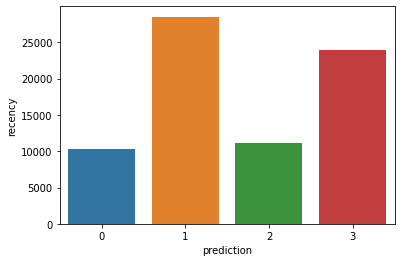

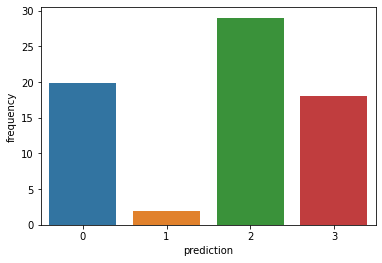

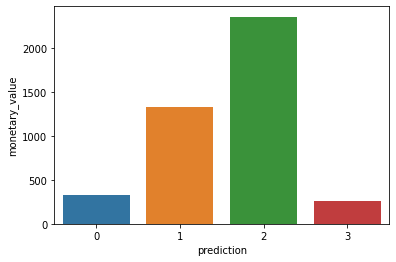

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('recency','frequency','monetary_value','prediction')
df_viz = df_viz.toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['recency','frequency','monetary_value']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()

# Conclusiones
### Estas conclusiones estan sujetas al resultado del algoritmo de aprendizaje automatico, podrian cambiar si se ejecuta de nuevo el algoritmo.

Aquí hay una descripción general de las características mostradas por los clientes en cada grupo:

Grupo 0: los clientes de este segmento muestran poca actualidad, frecuencia y valor monetario. Rara vez compran en la plataforma y son clientes de bajo potencial que probablemente dejarán de hacer negocios con la empresa de comercio electrónico.

Grupo 1: los usuarios de este grupo muestran una alta antigüedad, pero no se les ha visto gastar mucho en la plataforma. Tampoco visitan el sitio con frecuencia. Esto indica que podrían ser clientes más nuevos que acaban de comenzar a hacer negocios con la empresa.

Grupo 2: los clientes de este segmento muestran una frecuencia y actualidad medias y gastan mucho dinero en la plataforma. Esto indica que tienden a comprar artículos de alto valor o hacer compras al por mayor.

Grupo 3: el segmento final comprende a los usuarios que muestran una alta actualidad y realizan compras frecuentes en la plataforma. Sin embargo, no gastan mucho en la plataforma, lo que podría significar que tienden a seleccionar artículos más baratos en cada compra.